In [5]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2 

In [3]:
dens_path = '/storage/filament/result/cluster_3d/40Mpc/density_temp/box02/subbox02/dens/0/'

In [7]:
nx= 101 
dens = np.zeros([101,101,101])
for i in range(nx):
    dens[i,:,:] = cv2.imread(dens_path + str(i) + '.png',cv2.IMREAD_GRAYSCALE)

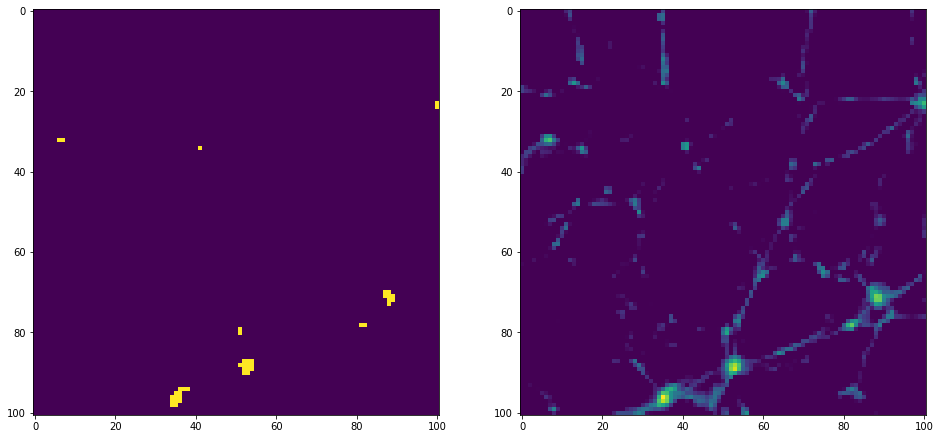

In [36]:
i  = 80
plt.figure(figsize=[16,8])
plt.subplot(121)
plt.imshow(dens[i,:,:] > 96)
plt.subplot(122)
plt.imshow(dens[i,:,:])

In [27]:
np.max(dens[50,:,:])

240.0

In [ ]:
candidate_coordx = []
candidate_coordy = []
candidate_coordz = []

for iz in range(nx):
    for iy in range(nx):
        for ix in range(nx):
            if xray_re[ix,iy,iz] >= 10**(-5.5):
                
                virial_radius = 0
                # virial raius 계산
                for vr in range(10):
                    #if(ix-vr>=0 and ix+vr <= 255 and iy-vr>=0 and iy+vr<=255 and iz-vr>=0 and iz+vr<=255 ):
                    critical_density = np.mean(dens[ix-vr:ix+vr , iy-vr:iy+vr , iz-vr:iz+vr])
                    #print(critical_density)
                    if (critical_density < 200):
                        virial_radius = vr
                        #print(virial_radius)
                        break;
                    else:
                        pass
                
                # 주변 local maximun tag
                if not virial_radius ==0:
                    ref_value = xray_re[ix,iy,iz]
                    tmp_x = ix
                    tmp_y = iy
                    tmp_z = iz
                    max_value = ref_value
                    for rx in range(-virial_radius,virial_radius+1):
                        for ry in range(-virial_radius,virial_radius+1):
                            for rz in range(-virial_radius,virial_radius+1):
                                if ref_value < xray_re[ix+rx, iy+ry, iz+rz]:
                                    tmp_x = 0
                                    tmp_y = 0
                                    tmp_z = 0
                                    
                                    
                                else:
                                    pass
                                
                candidate_coordx.append(tmp_x)
                candidate_coordy.append(tmp_y)
                candidate_coordz.append(tmp_z)

In [84]:
coords = list(set(list(zip(candidate_coordx,candidate_coordy,candidate_coordz))))
coords = np.array(sorted(coords, key = lambda x:x[2]))

/home/ha/anaconda3/envs/cluster/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


ValueError: zero-size array to reduction operation minimum which has no identity

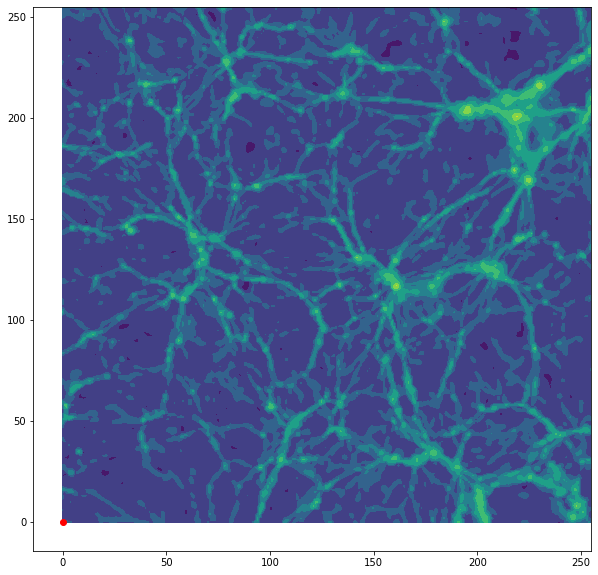

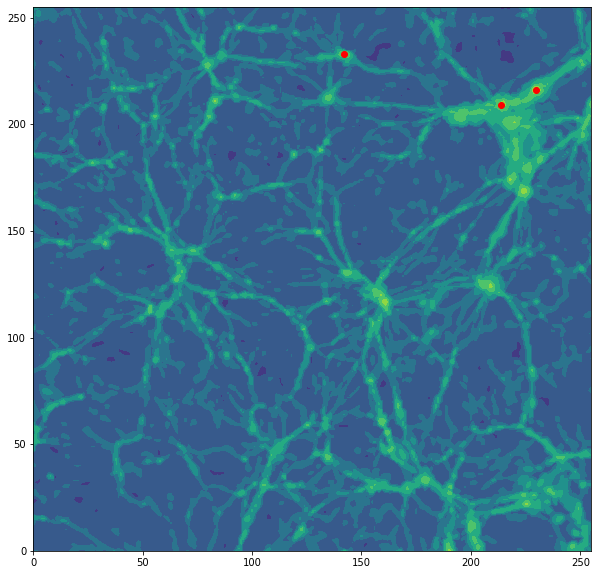

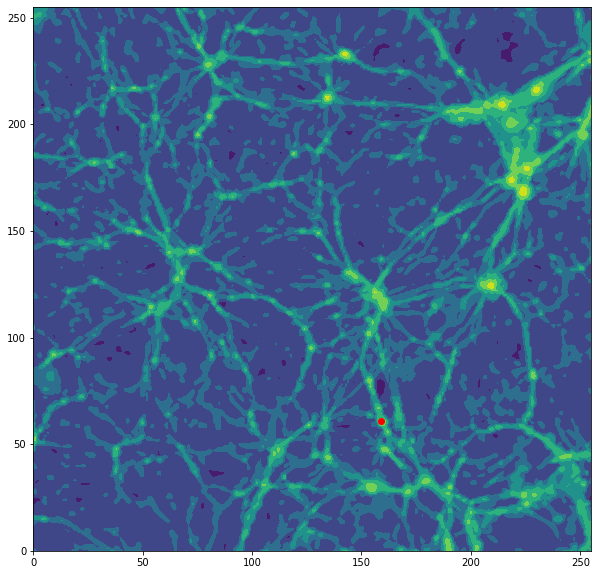

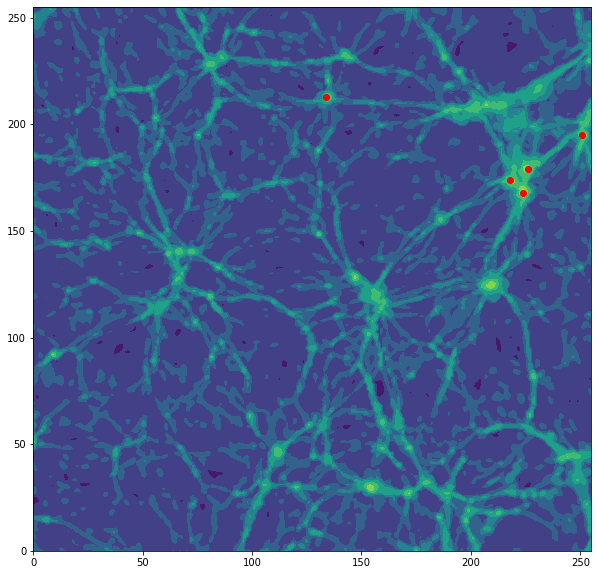

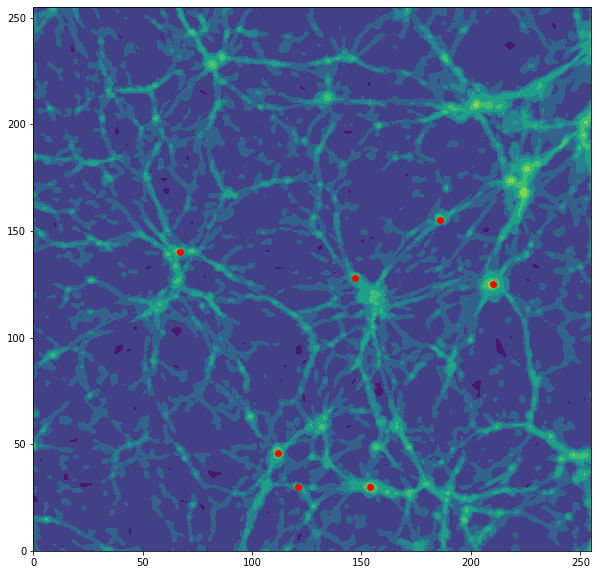

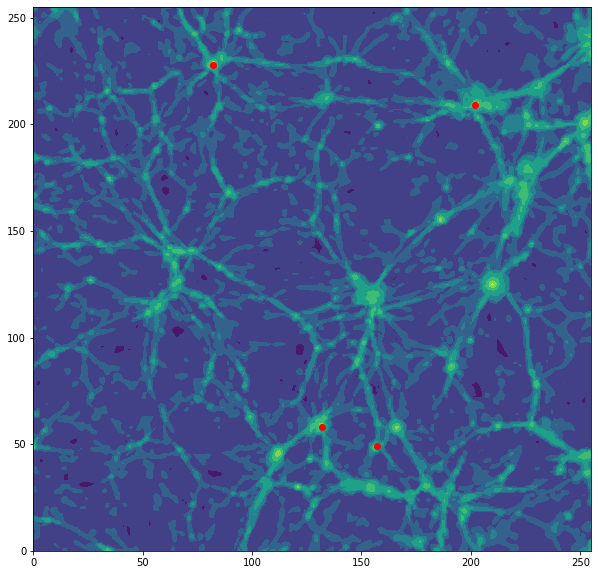

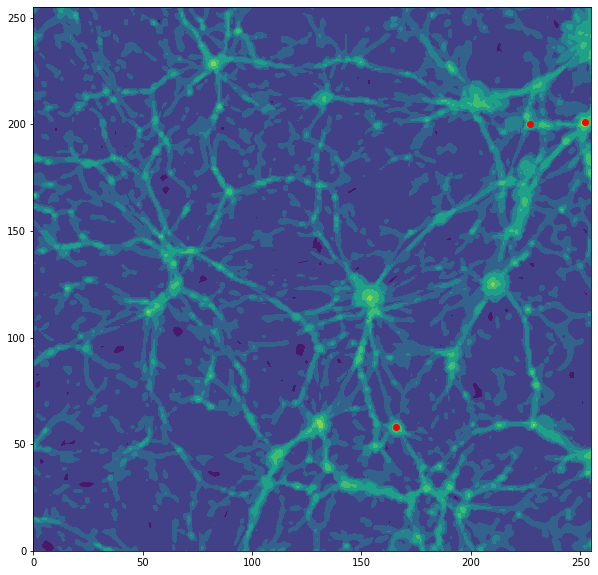

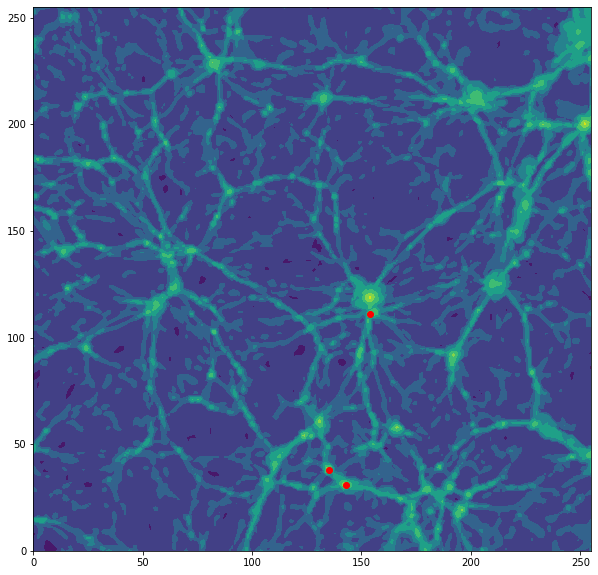

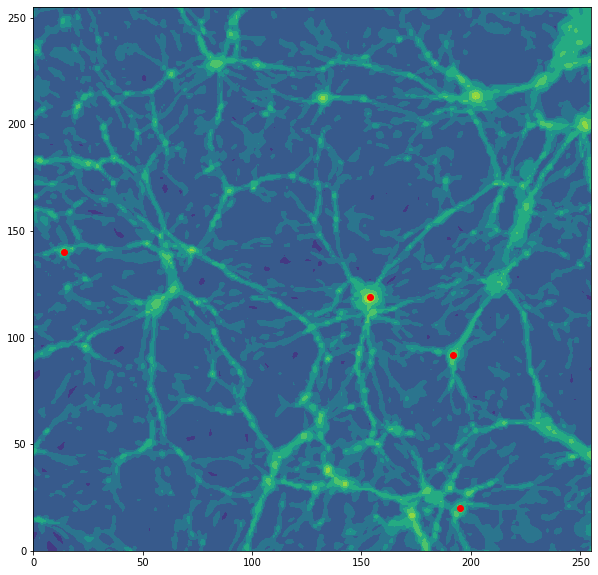

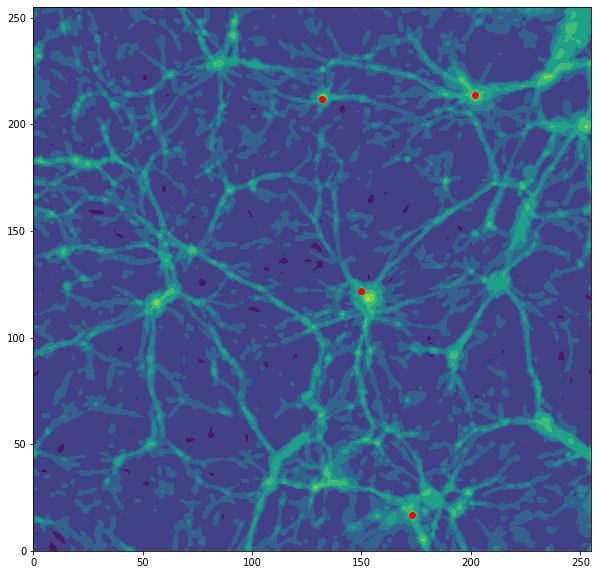

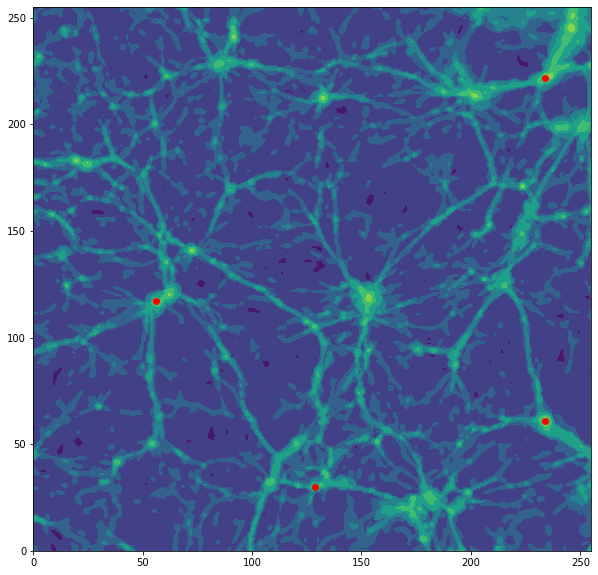

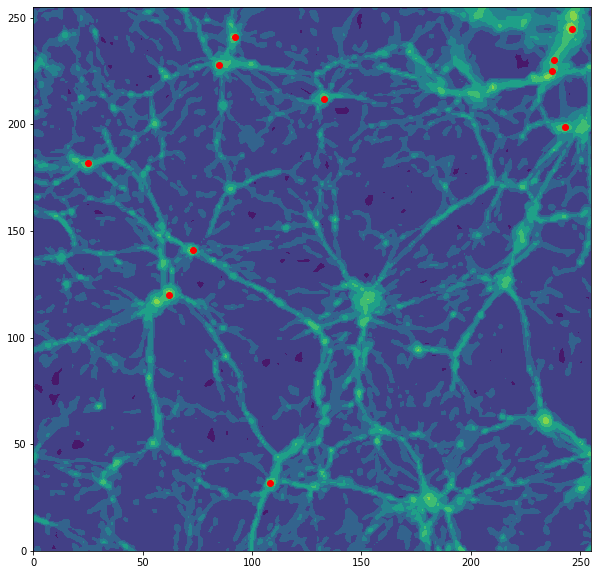

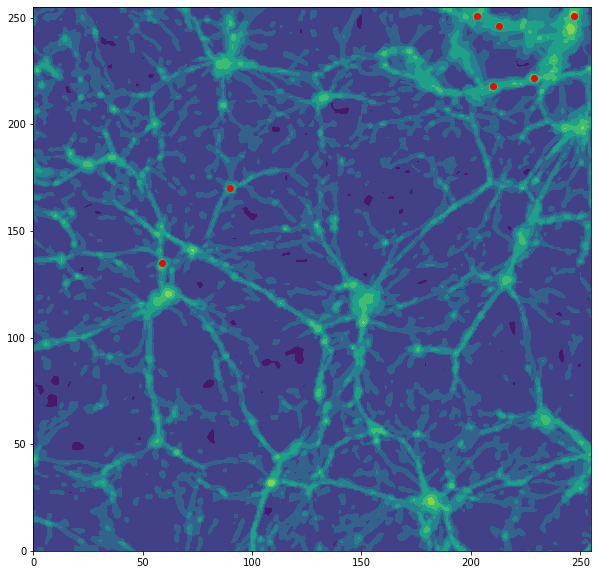

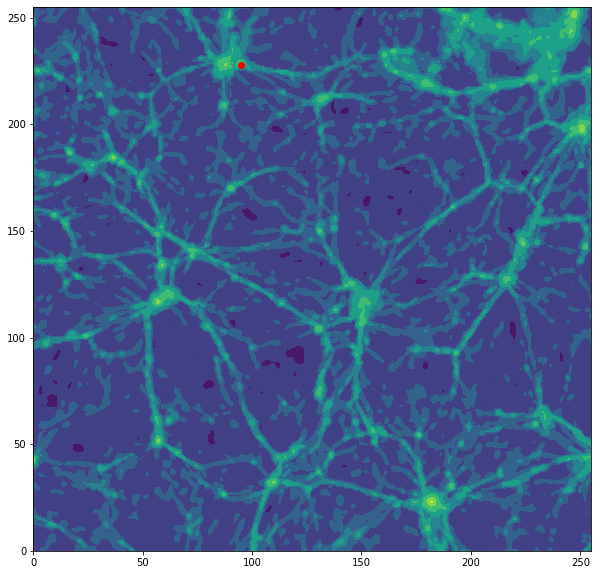

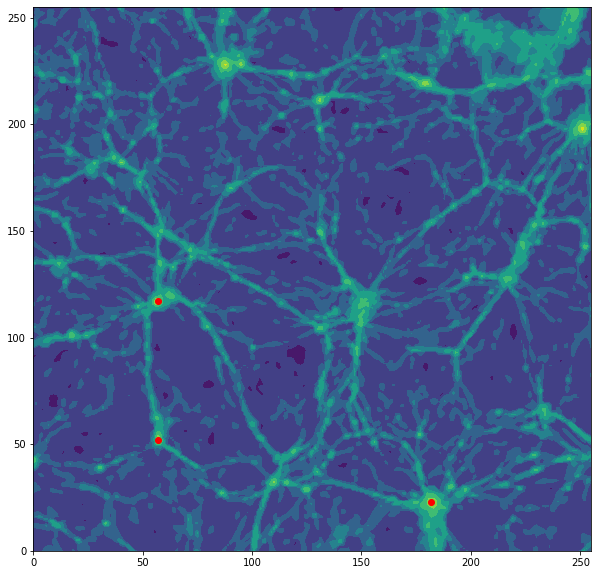

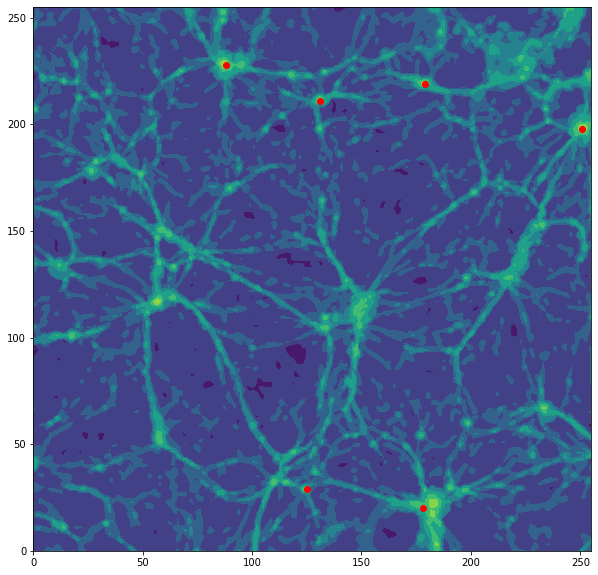

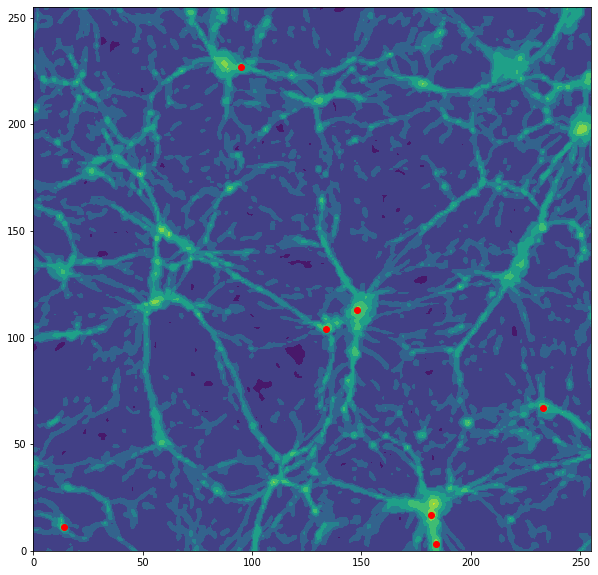

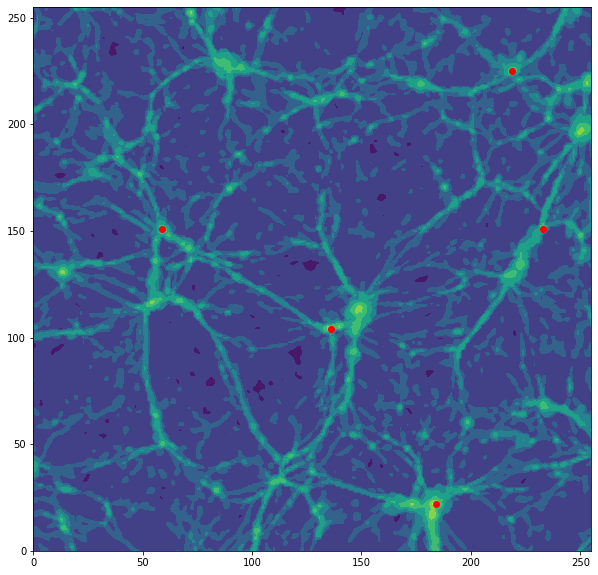

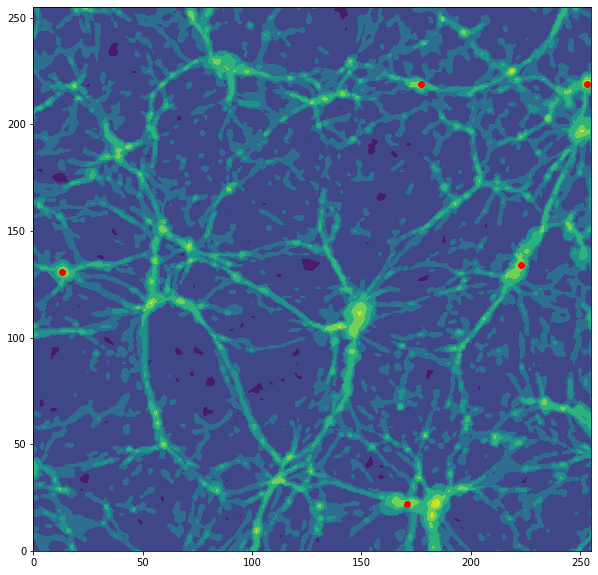

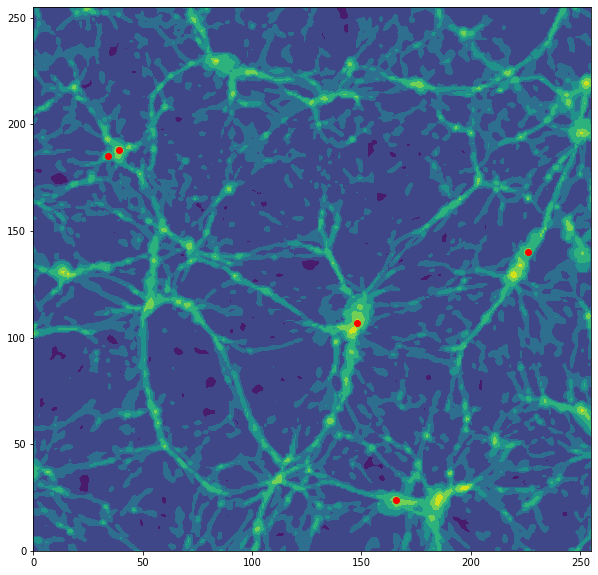

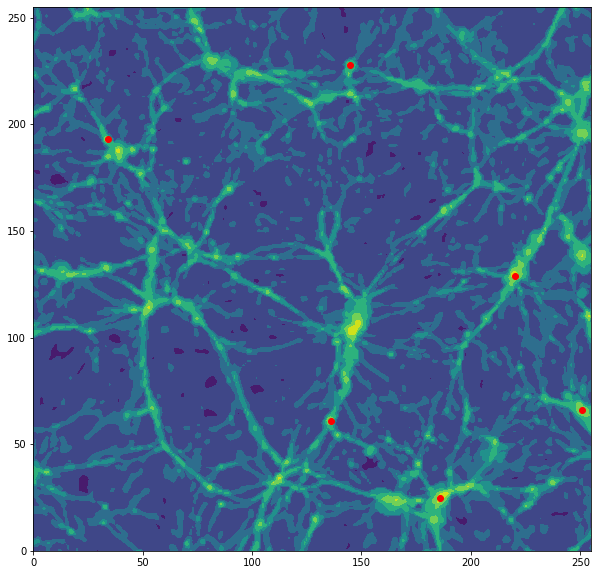

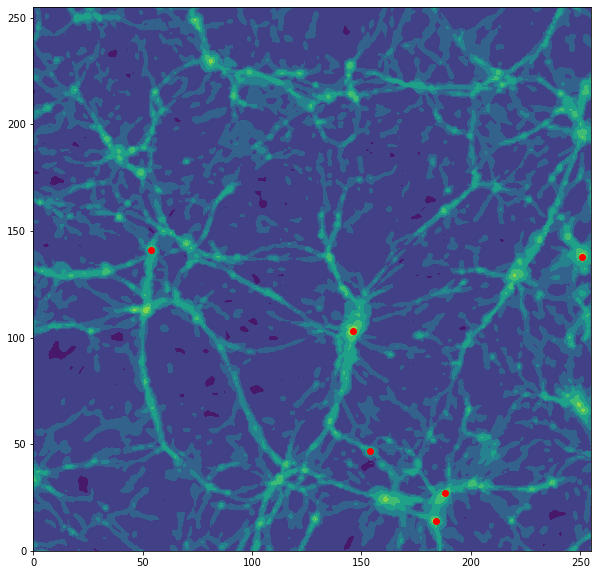

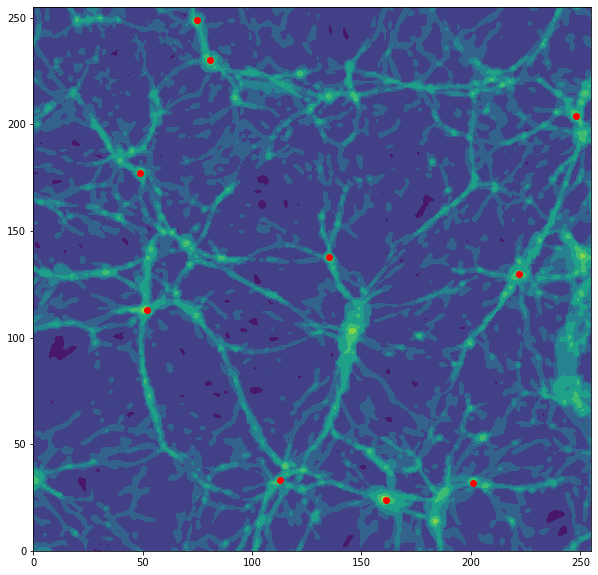

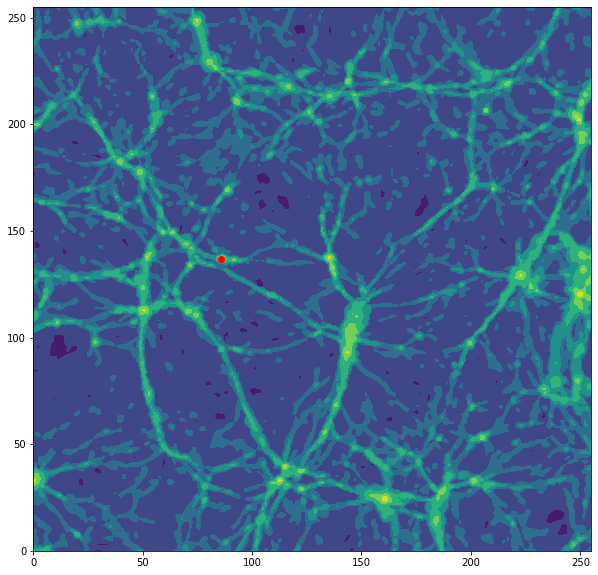

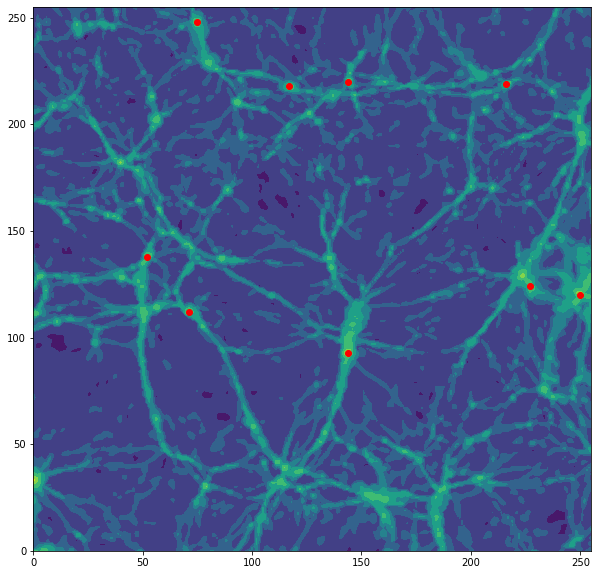

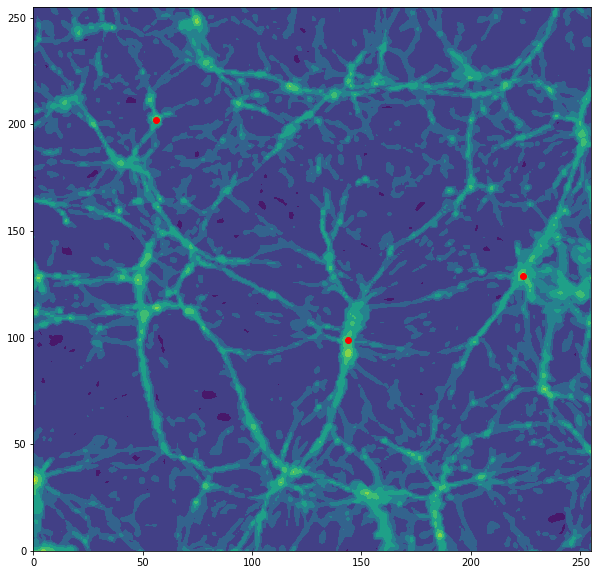

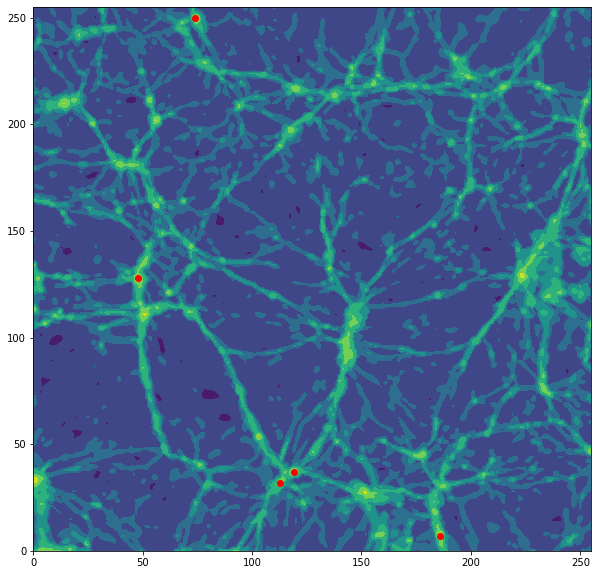

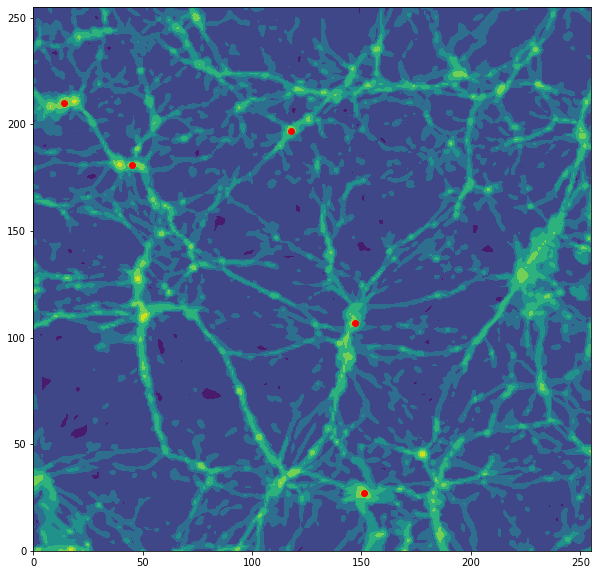

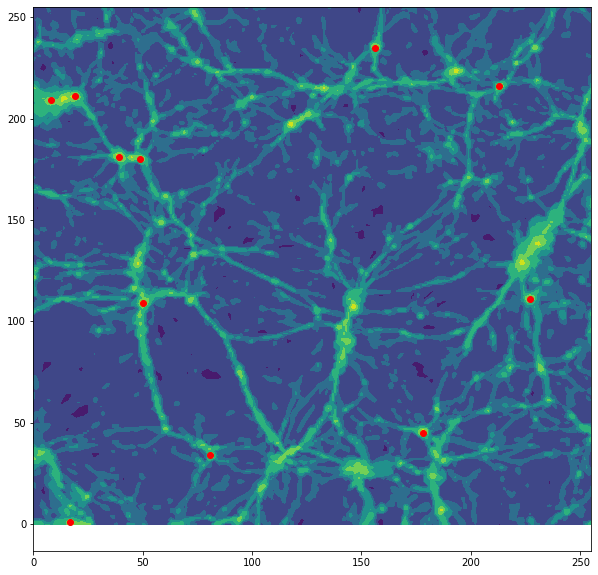

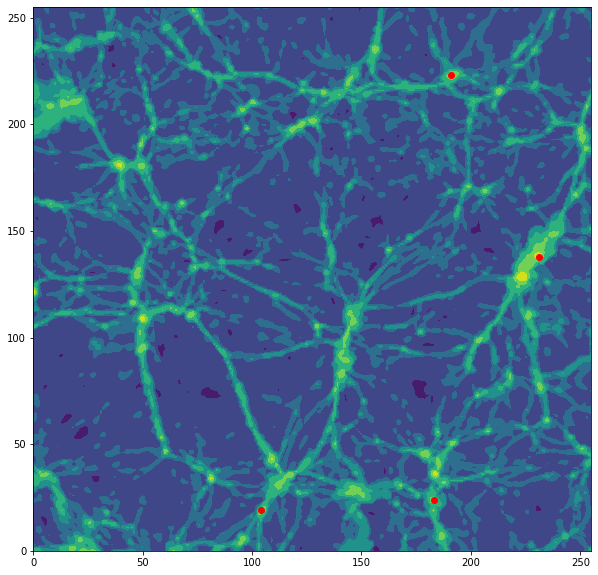

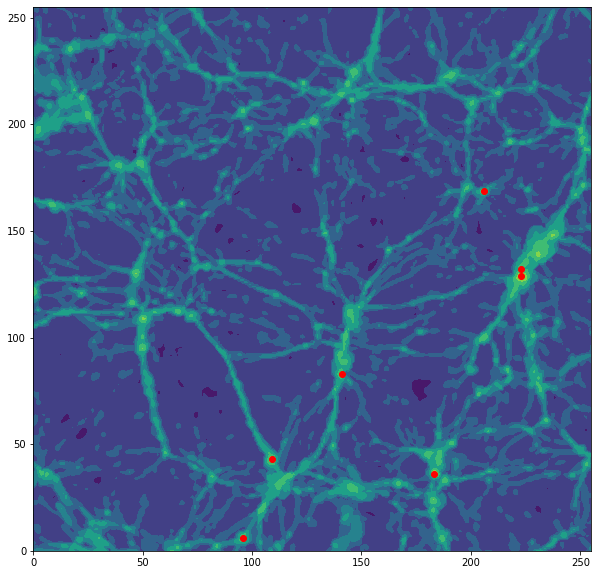

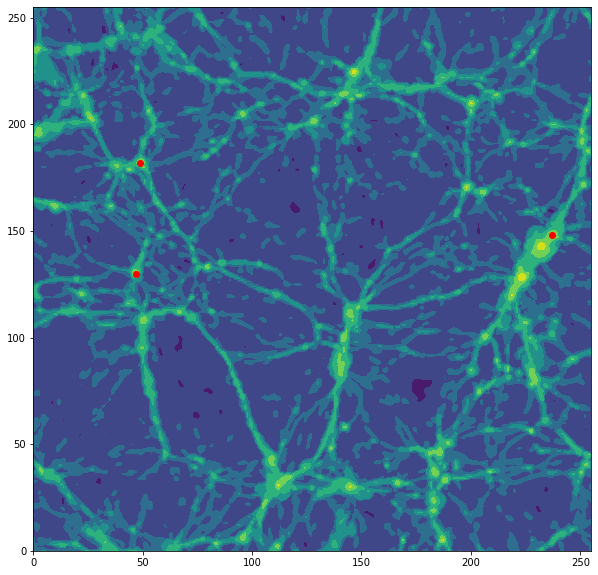

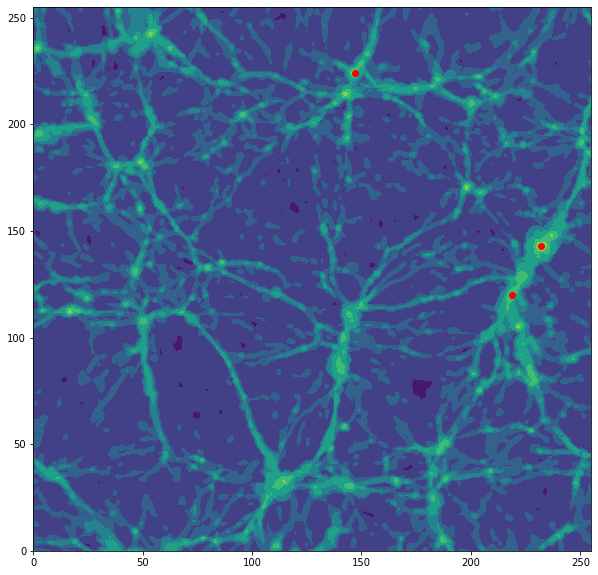

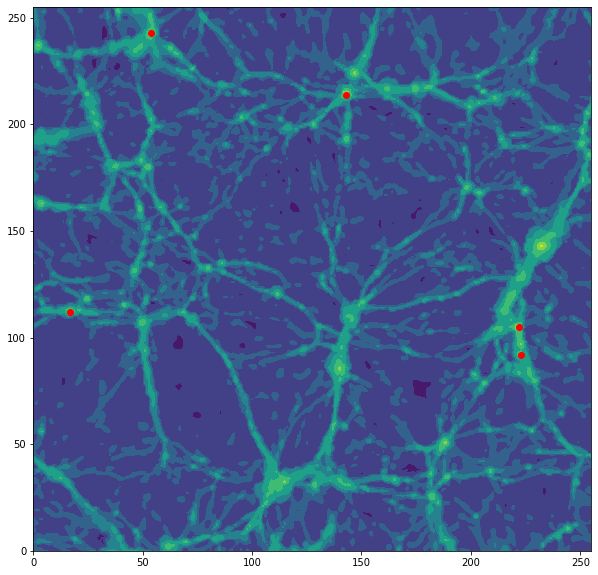

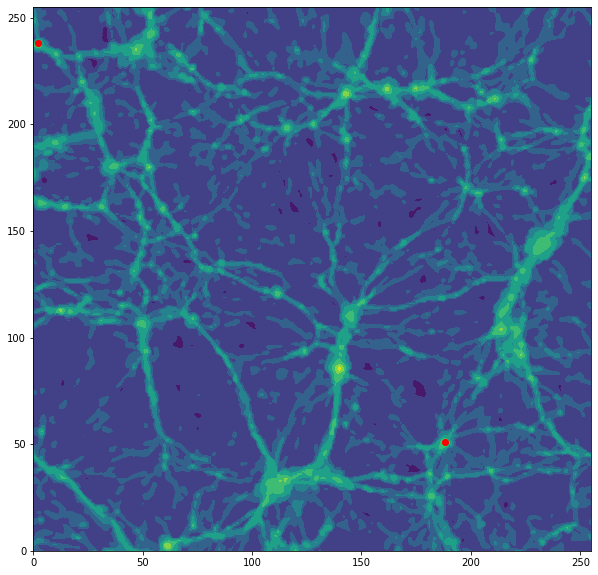

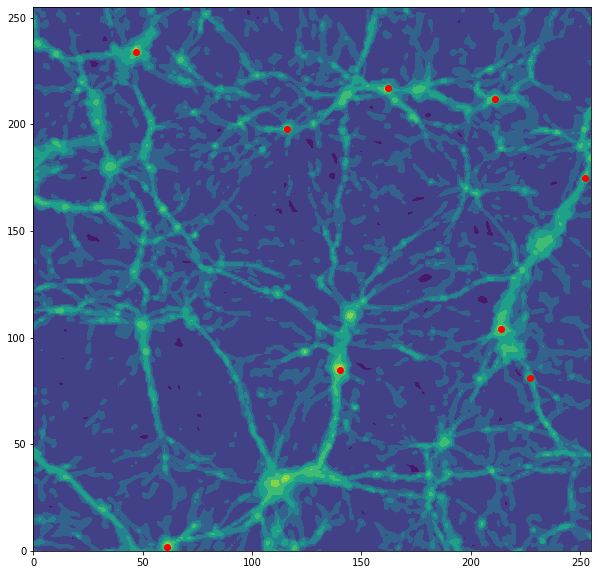

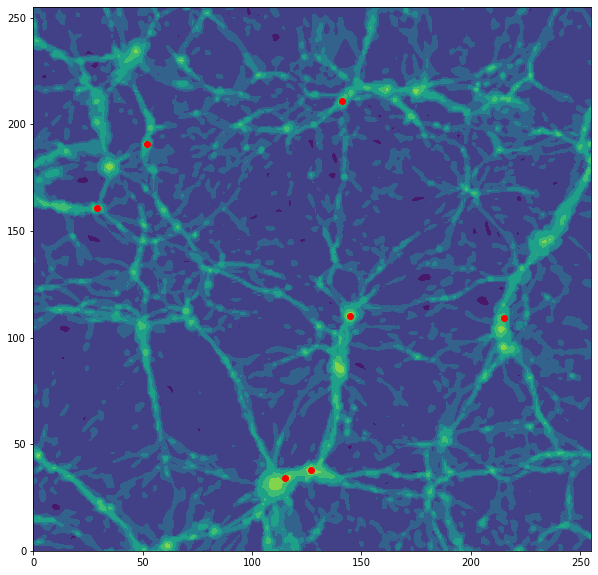

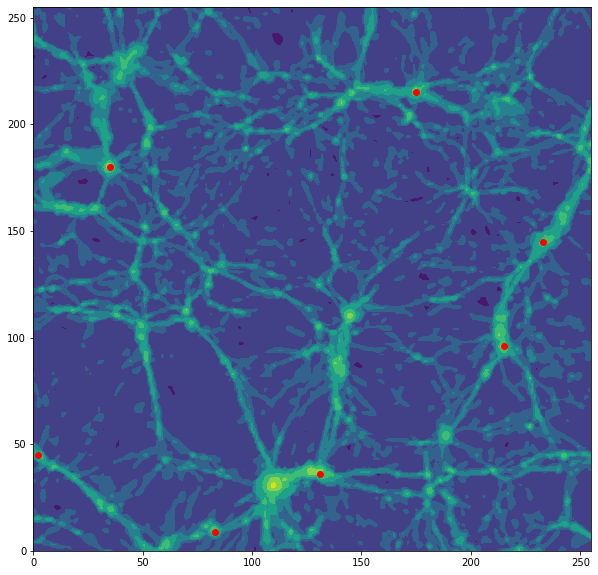

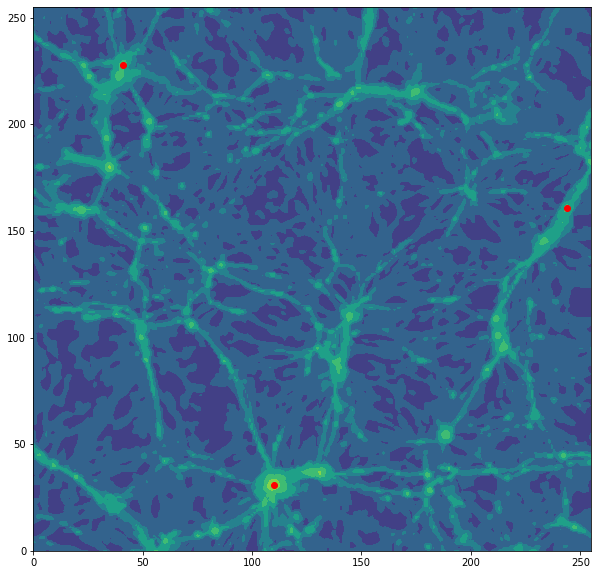

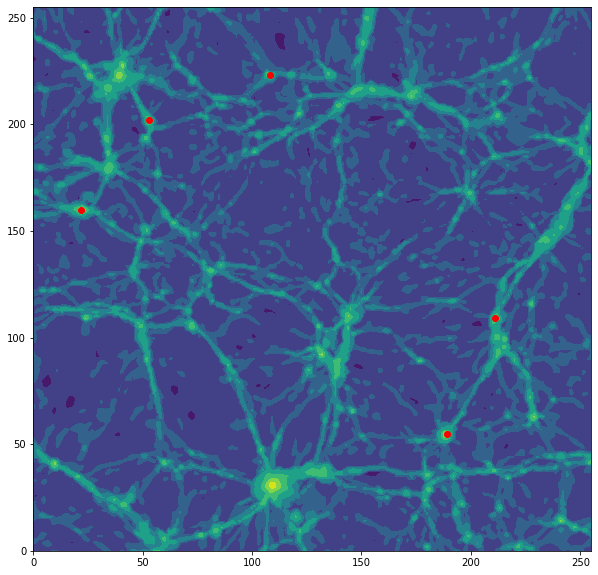

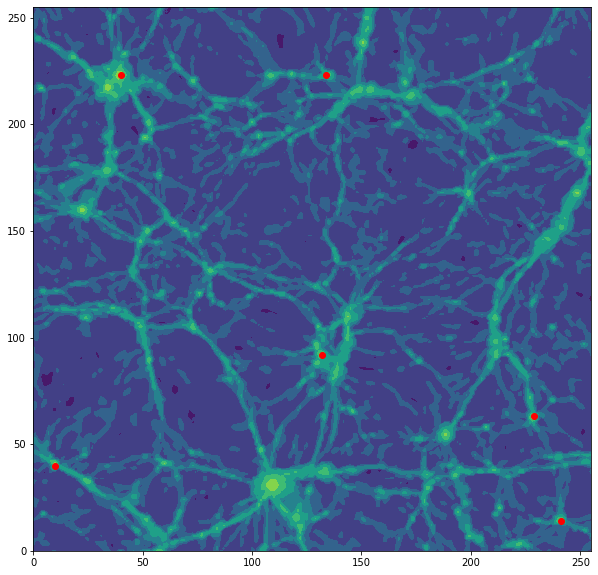

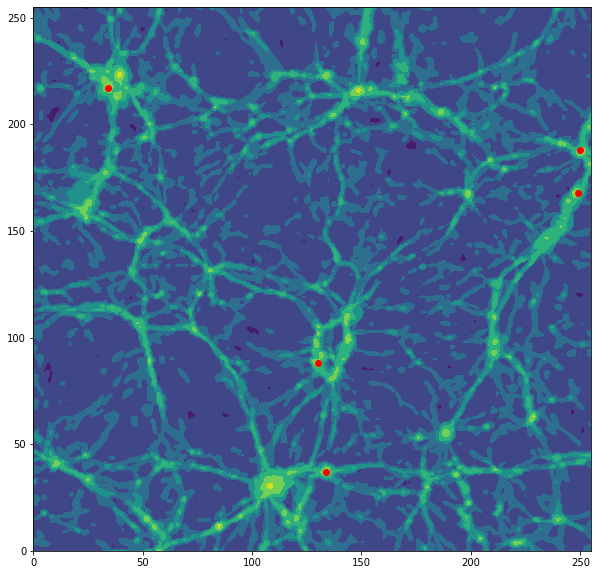

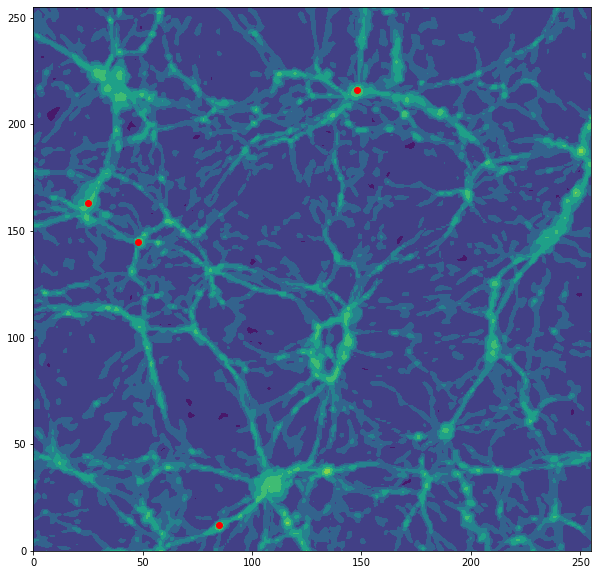

<Figure size 720x720 with 0 Axes>

In [100]:
i=10
for i in range(256):
    plt.figure(figsize=[10,10])
    min_coords = np.min(np.where(coords[:,2]==i))
    max_coords = np.max(np.where(coords[:,2]==i))
    plt.contourf(np.log10(xray_re[:,:,i]))
    plt.scatter(coords[min_coords:max_coords+1,1],coords[min_coords:max_coords+1,0],c='red')
    plt.savefig('/storage/cluster/result/' + str(i) + '.png', )
    

In [111]:
coords[:,0]

array([  0, 216, 209, ...,  65, 237, 200])

In [110]:
coords

array([[  0,   0,   0],
       [216, 230,   1],
       [209, 214,   1],
       ...,
       [ 65,  14, 254],
       [237, 131, 254],
       [200, 227, 255]])

In [112]:
df = pd.DataFrame({'x':coords[:,0],'y':coords[:,1],'z':coords[:,2]})
df.to_excel('/storage/cluster/data/coords.xlsx')